In [63]:
from pymongo import MongoClient
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns 
from mplsoccer import Pitch

In [3]:

# Connexion à MongoDB local (ou distant si vous avez l'URL)
client = MongoClient('mongodb://localhost:27017/')  # Remplacez l'URL si nécessaire

# Sélection de la base de données
db = client['bvb_2024_2025']

# Sélection de la collection
collection_matches= db['matches_bvb_2024']
collection_players = db['player_stats_bvb_2024']
collection_shots = db['shots_bvb_2024']


# bvb Perfomance

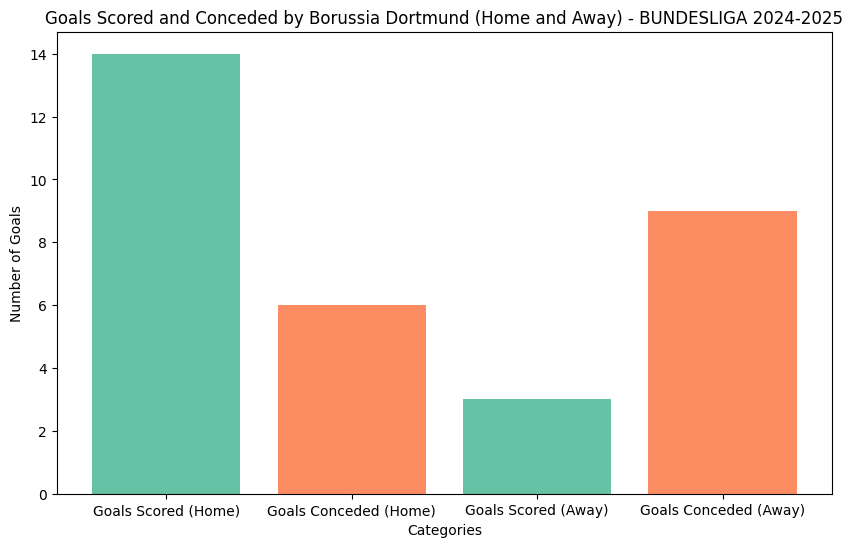

In [12]:
# Extraction des données pour les matches de Borussia Dortmund
matches_bvb_home = list(collection_matches.find({"home_team": "Borussia Dortmund"}))
matches_bvb_away = list(collection_matches.find({"away_team": "Borussia Dortmund"}))

# Initialisation des variables pour les buts marqués et concédés
home_goals_scored = 0
home_goals_conceded = 0
away_goals_scored = 0
away_goals_conceded = 0

# Fonction pour vérifier et convertir les scores
def safe_convert(score):
    return int(score) if score is not None else 0

# Calcul des buts marqués et concédés à domicile
for match in matches_bvb_home:
    home_goals_scored += safe_convert(match.get("home_score"))
    home_goals_conceded += safe_convert(match.get("away_score"))

# Calcul des buts marqués et concédés à l'extérieur
for match in matches_bvb_away:
    away_goals_scored += safe_convert(match.get("away_score"))
    away_goals_conceded += safe_convert(match.get("home_score"))

# Données pour le graphique
labels = ['Goals Scored (Home)', 'Goals Conceded (Home)', 'Goals Scored (Away)', 'Goals Conceded (Away)']
values = [home_goals_scored, home_goals_conceded, away_goals_scored, away_goals_conceded]

# Création du graphique en barres avec la palette de couleurs "tab10"
colors = plt.get_cmap('Set2').colors

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=[colors[0], colors[1], colors[0], colors[1]])
plt.title("Goals Scored and Conceded by Borussia Dortmund (Home and Away) - BUNDESLIGA 2024-2025")
plt.xlabel("Categories")
plt.ylabel("Number of Goals")
plt.show()


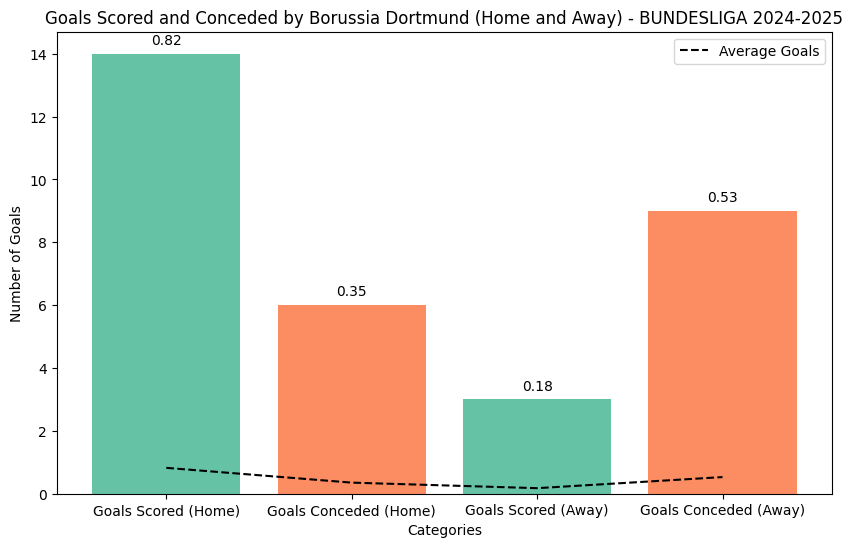

In [25]:
# Extraction des données pour les matches de Borussia Dortmund
matches_bvb_home = list(collection_matches.find({"home_team": "Borussia Dortmund"}))
matches_bvb_away = list(collection_matches.find({"away_team": "Borussia Dortmund"}))

# Initialisation des variables pour les buts marqués et concédés
home_goals_scored = 0
home_goals_conceded = 0
away_goals_scored = 0
away_goals_conceded = 0

# Fonction pour vérifier et convertir les scores
def safe_convert(score):
    return int(score) if score is not None else 0

# Calcul des buts marqués et concédés à domicile
for match in matches_bvb_home:
    home_goals_scored += safe_convert(match.get("home_score"))
    home_goals_conceded += safe_convert(match.get("away_score"))

# Calcul des buts marqués et concédés à l'extérieur
for match in matches_bvb_away:
    away_goals_scored += safe_convert(match.get("away_score"))
    away_goals_conceded += safe_convert(match.get("home_score"))

# Calcul des moyennes
avg_home_goals_scored = home_goals_scored / len(matches_bvb_home) if matches_bvb_home else 0
avg_home_goals_conceded = home_goals_conceded / len(matches_bvb_home) if matches_bvb_home else 0
avg_away_goals_scored = away_goals_scored / len(matches_bvb_away) if matches_bvb_away else 0
avg_away_goals_conceded = away_goals_conceded / len(matches_bvb_away) if matches_bvb_away else 0

# Données pour le graphique
labels = ['Goals Scored (Home)', 'Goals Conceded (Home)', 'Goals Scored (Away)', 'Goals Conceded (Away)']
values = [home_goals_scored, home_goals_conceded, away_goals_scored, away_goals_conceded]

# Création du graphique en barres avec la palette de couleurs "tab10"
colors = plt.get_cmap('Set2').colors

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=[colors[0], colors[1], colors[0], colors[1]])

# Ajouter une ligne pour la moyenne
avg_values = [avg_home_goals_scored, avg_home_goals_conceded, avg_away_goals_scored, avg_away_goals_conceded]
plt.plot(labels, avg_values, color='black', linestyle='--', label='Average Goals')

# Ajouter des annotations pour les moyennes
for i, bar in enumerate(bars):
    height = bar.get_height()
    avg = avg_values[i]
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{avg:.2f}', ha='center', va='bottom', color='black')

plt.title("Goals Scored and Conceded by Borussia Dortmund (Home and Away) - BUNDESLIGA 2024-2025")
plt.xlabel("Categories")
plt.ylabel("Number of Goals")
plt.legend()
plt.show()

In [26]:
print('home goals scored=' ,home_goals_scored )
print('home goals conceded=' ,home_goals_conceded )
print('away goals scored=' ,away_goals_scored )
print('away goals conceded=' ,away_goals_conceded )

print('********************************************')

print('Avergae home goals scored=' ,avg_home_goals_scored )
print('Avergae home goals conceded=' ,avg_home_goals_conceded )
print('Avergae away goals scored=' ,avg_away_goals_scored )
print('Avergae away goals conceded=' ,avg_away_goals_conceded )


home goals scored= 14
home goals conceded= 6
away goals scored= 3
away goals conceded= 9
********************************************
Avergae home goals scored= 0.8235294117647058
Avergae home goals conceded= 0.35294117647058826
Avergae away goals scored= 0.17647058823529413
Avergae away goals conceded= 0.5294117647058824


In the 2024-2025 Bundesliga season, Borussia Dortmund has played a total of 9 matches, with both home and away results showcasing their goal-scoring and defensive performance:

Home Matches:

Goals Scored: Dortmund scored a total of 14 goals at home, averaging 0.82 goals per match.

Goals Conceded: They conceded 6 goals at home, with an average of 0.35 goals conceded per match, demonstrating a solid defensive record.

Away Matches:

Goals Scored: On the road, Dortmund scored 3 goals, averaging just 0.18 goals per match, indicating a struggle to find the net away from home.

Goals Conceded: The team conceded 9 goals away, with an average of 0.53 goals conceded per match, showing a slightly weaker defensive performance in away games compared to home.

This analysis highlights Borussia Dortmund's strong home form, both in terms of goals scored and defensive solidity, while their away performance, particularly in attack, has been less consistent.

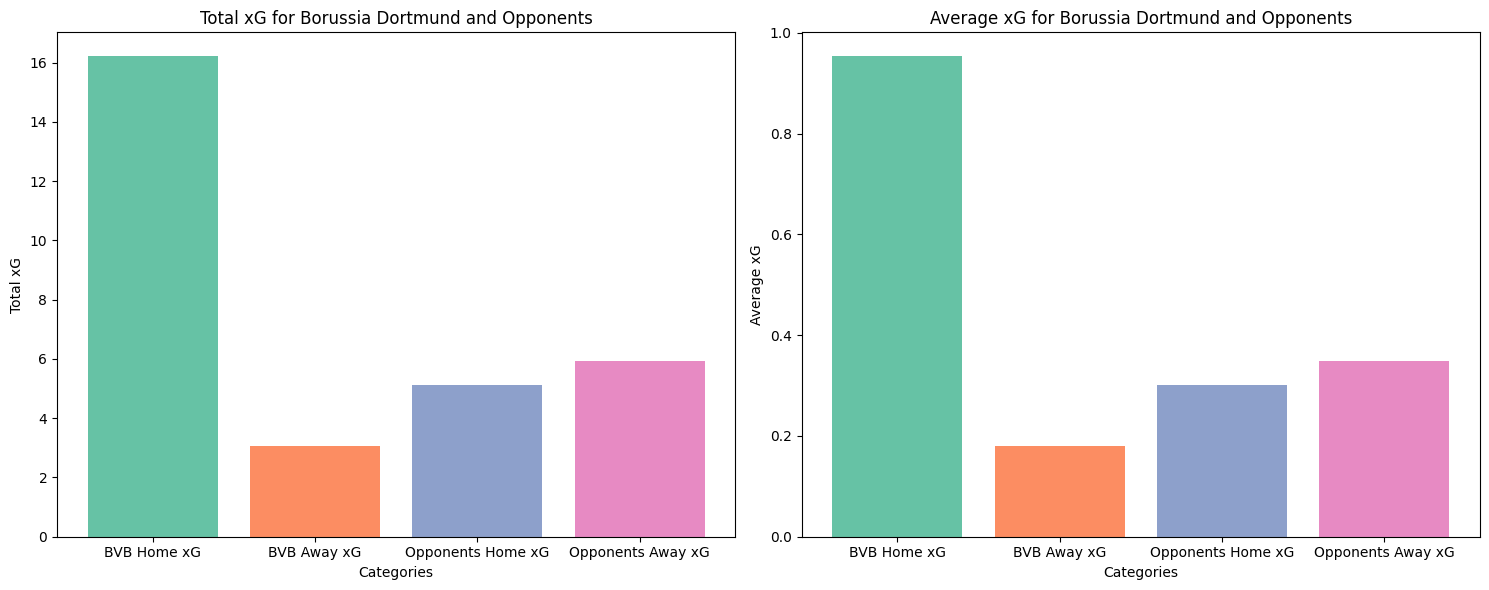

In [18]:
# Extraction des données pour les matches de Borussia Dortmund
matches_bvb_home = list(collection_matches.find({"home_team": "Borussia Dortmund"}))
matches_bvb_away = list(collection_matches.find({"away_team": "Borussia Dortmund"}))

# Initialisation des variables pour les xG
total_home_xG = 0
total_away_xG = 0
total_home_xG_opponents = 0
total_away_xG_opponents = 0

# Fonction pour vérifier et convertir les xG
def safe_convert_xg(xg):
    return float(xg) if xg is not None else 0.0

# Calcul des xG à domicile et pour les adversaires
for match in matches_bvb_home:
    total_home_xG += safe_convert_xg(match.get("home_xG"))
    total_home_xG_opponents += safe_convert_xg(match.get("away_xG"))

# Calcul des xG à l'extérieur et pour les adversaires
for match in matches_bvb_away:
    total_away_xG += safe_convert_xg(match.get("away_xG"))
    total_away_xG_opponents += safe_convert_xg(match.get("home_xG"))

# Nombre de matches à domicile et à l'extérieur
num_home_matches = len(matches_bvb_home)
num_away_matches = len(matches_bvb_away)

# Calcul des moyennes des xG
avg_home_xG = total_home_xG / num_home_matches if num_home_matches else 0
avg_away_xG = total_away_xG / num_away_matches if num_away_matches else 0
avg_home_xG_opponents = total_home_xG_opponents / num_home_matches if num_home_matches else 0
avg_away_xG_opponents = total_away_xG_opponents / num_away_matches if num_away_matches else 0

# Données pour le graphique en barres
labels = ['BVB Home xG', 'BVB Away xG', 'Opponents Home xG', 'Opponents Away xG']
total_values = [total_home_xG, total_away_xG, total_home_xG_opponents, total_away_xG_opponents]
avg_values = [avg_home_xG, avg_away_xG, avg_home_xG_opponents, avg_away_xG_opponents]

# Création du graphique en barres pour les sommes des xG
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(labels, total_values, color=plt.get_cmap('Set2').colors)
plt.title("Total xG for Borussia Dortmund and Opponents")
plt.xlabel("Categories")
plt.ylabel("Total xG")

# Création du graphique en barres pour les moyennes des xG
plt.subplot(1, 2, 2)
plt.bar(labels, avg_values, color=plt.get_cmap('Set2').colors)
plt.title("Average xG for Borussia Dortmund and Opponents")
plt.xlabel("Categories")
plt.ylabel("Average xG")

plt.tight_layout()
plt.show()

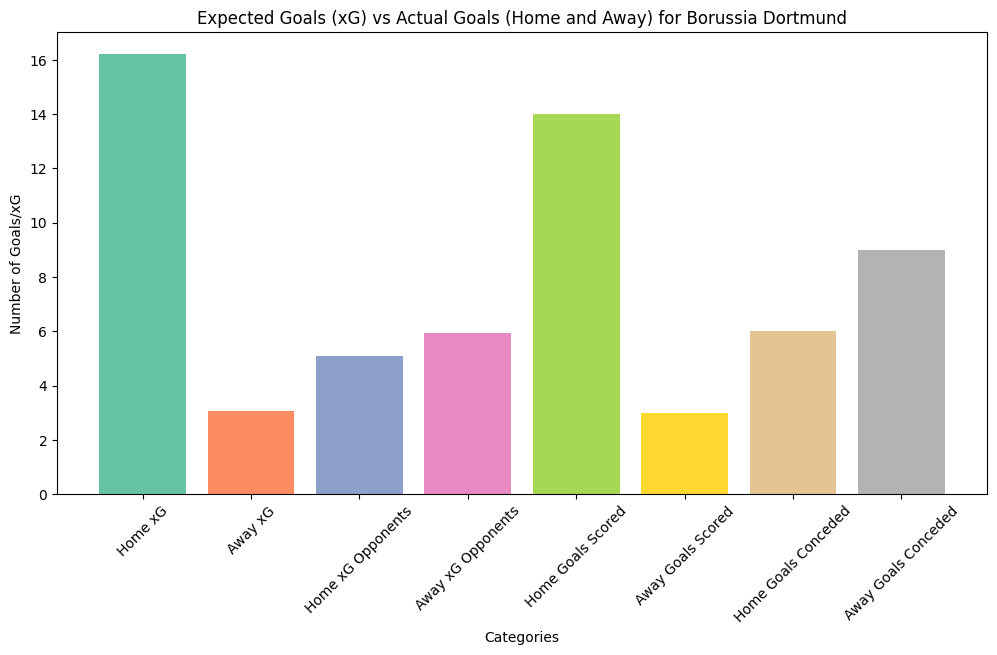

In [21]:
# Initialisation des variables pour les xG et les buts réels
total_home_xG = 0
total_away_xG = 0
total_home_xG_opponents = 0
total_away_xG_opponents = 0
total_home_goals_scored = 0
total_away_goals_scored = 0
total_home_goals_conceded = 0
total_away_goals_conceded = 0

# Fonction pour vérifier et convertir les xG
def safe_convert_xg(xg):
    return float(xg) if xg is not None else 0.0

# Fonction pour vérifier et convertir les scores
def safe_convert_score(score):
    return int(score) if score is not None else 0

# Calcul des xG et des buts à domicile et pour les adversaires
for match in matches_bvb_home:
    total_home_xG += safe_convert_xg(match.get("home_xG"))
    total_home_xG_opponents += safe_convert_xg(match.get("away_xG"))
    total_home_goals_scored += safe_convert_score(match["home_score"])
    total_home_goals_conceded += safe_convert_score(match["away_score"])

# Calcul des xG et des buts à l'extérieur et pour les adversaires
for match in matches_bvb_away:
    total_away_xG += safe_convert_xg(match.get("away_xG"))
    total_away_xG_opponents += safe_convert_xg(match.get("home_xG"))
    total_away_goals_scored += safe_convert_score(match["away_score"])
    total_away_goals_conceded += safe_convert_score(match["home_score"])

# Données pour le graphique en barres
labels = ['Home xG', 'Away xG', 'Home xG Opponents', 'Away xG Opponents', 
          'Home Goals Scored', 'Away Goals Scored', 'Home Goals Conceded', 'Away Goals Conceded']
values = [total_home_xG, total_away_xG, total_home_xG_opponents, total_away_xG_opponents, 
          total_home_goals_scored, total_away_goals_scored, total_home_goals_conceded, total_away_goals_conceded]

# Création du graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color=plt.get_cmap('Set2').colors)
plt.title("Expected Goals (xG) vs Actual Goals (Home and Away) for Borussia Dortmund")
plt.xlabel("Categories")
plt.ylabel("Number of Goals/xG")
plt.xticks(rotation=45)
plt.show()


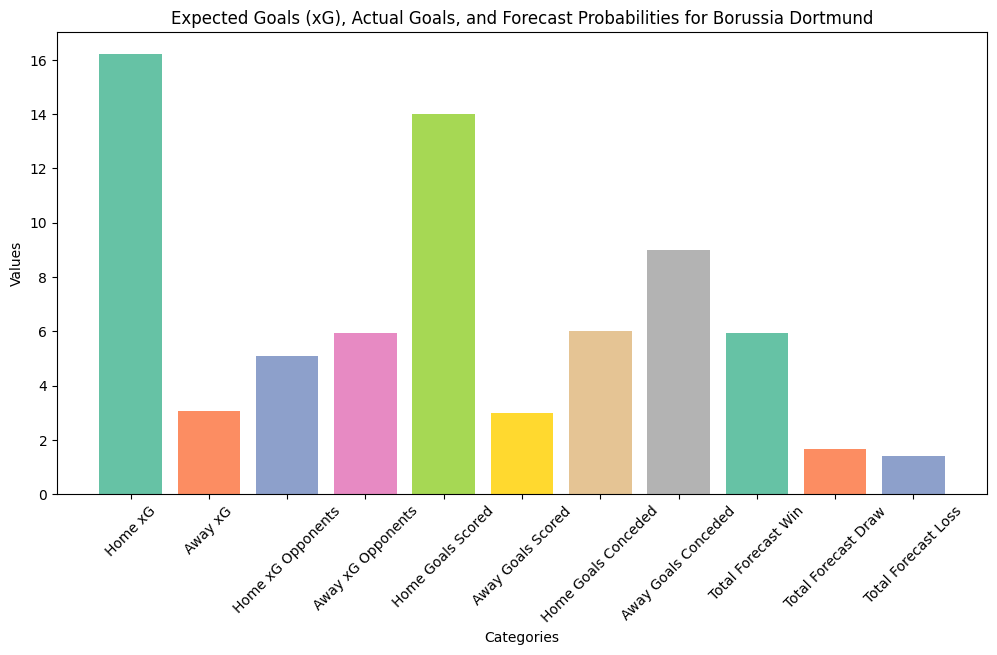

In [22]:
# Initialisation des variables pour les xG, les buts réels et les probabilités
total_home_xG = 0
total_away_xG = 0
total_home_xG_opponents = 0
total_away_xG_opponents = 0
total_home_goals_scored = 0
total_away_goals_scored = 0
total_home_goals_conceded = 0
total_away_goals_conceded = 0
total_forecast_win = 0
total_forecast_draw = 0
total_forecast_loss = 0

# Fonction pour vérifier et convertir les xG
def safe_convert_xg(xg):
    return float(xg) if xg is not None else 0.0

# Fonction pour vérifier et convertir les scores
def safe_convert_score(score):
    return int(score) if score is not None else 0

# Fonction pour vérifier et convertir les probabilités
def safe_convert_probability(probability):
    return float(probability) if probability is not None else 0.0

# Calcul des xG et des buts à domicile et pour les adversaires
for match in matches_bvb_home:
    total_home_xG += safe_convert_xg(match.get("home_xG"))
    total_home_xG_opponents += safe_convert_xg(match.get("away_xG"))
    total_home_goals_scored += safe_convert_score(match["home_score"])
    total_home_goals_conceded += safe_convert_score(match["away_score"])

# Calcul des xG et des buts à l'extérieur et pour les adversaires
for match in matches_bvb_away:
    total_away_xG += safe_convert_xg(match.get("away_xG"))
    total_away_xG_opponents += safe_convert_xg(match.get("home_xG"))
    total_away_goals_scored += safe_convert_score(match["away_score"])
    total_away_goals_conceded += safe_convert_score(match["home_score"])

# Calcul des probabilités pour les matches à domicile et à l'extérieur
for match in matches_bvb_home + matches_bvb_away:
    total_forecast_win += safe_convert_probability(match.get("forecast_win"))
    total_forecast_draw += safe_convert_probability(match.get("forecast_draw"))
    total_forecast_loss += safe_convert_probability(match.get("forecast_loss"))

# Données pour le graphique en barres
labels = ['Home xG', 'Away xG', 'Home xG Opponents', 'Away xG Opponents', 
          'Home Goals Scored', 'Away Goals Scored', 'Home Goals Conceded', 'Away Goals Conceded',
          'Total Forecast Win', 'Total Forecast Draw', 'Total Forecast Loss']
values = [total_home_xG, total_away_xG, total_home_xG_opponents, total_away_xG_opponents, 
          total_home_goals_scored, total_away_goals_scored, total_home_goals_conceded, total_away_goals_conceded,
          total_forecast_win, total_forecast_draw, total_forecast_loss]

# Création du graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color=plt.get_cmap('Set2').colors)
plt.title("Expected Goals (xG), Actual Goals, and Forecast Probabilities for Borussia Dortmund")
plt.xlabel("Categories")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()


# player performance

In [29]:
# Assuming you have collections `collection_matches` and `collection_player`
# Initialize an empty list to store valid player stats with matching match_id
players_stats = []

# Iterate over each player document in the `collection_player`
for player_doc in collection_players.find():
    match_id = player_doc.get('match_id')
    
    # Query the matches collection to check if there is a match for this match_id
    match_found = collection_matches.find_one({"match_id": match_id})
    
    if match_found:
        # If a match is found, add the player stats to the players_stats list
        players_stats.append(player_doc)

# Output the results to see what has been added to players_stats
for stat in players_stats:
    print(stat)


{'_id': ObjectId('672d70da6a1489f850c25cbc'), 'player_id': '5288', 'match_id': '27748', 'player': 'Gregor Kobel', 'goals': '0', 'shots': '0', 'xG': '0', 'yellow_cards': '0', 'red_cards': '0', 'key_passes': '0', 'assists': '0', 'xA': '0', 'h_a': 'h', 'minutes_played': '90', 'position': 'GK', 'position_order': '1'}
{'_id': ObjectId('672d70da6a1489f850c25cbd'), 'player_id': '7485', 'match_id': '27748', 'player': 'Nico Schlotterbeck', 'goals': '0', 'shots': '2', 'xG': '0.02620670385658741', 'yellow_cards': '0', 'red_cards': '0', 'key_passes': '1', 'assists': '0', 'xA': '0.028114479035139084', 'h_a': 'h', 'minutes_played': '90', 'position': 'DC', 'position_order': '3'}
{'_id': ObjectId('672d70da6a1489f850c25cbe'), 'player_id': '75', 'match_id': '27748', 'player': 'Niklas Süle', 'goals': '0', 'shots': '2', 'xG': '0.1406863033771515', 'yellow_cards': '0', 'red_cards': '0', 'key_passes': '1', 'assists': '0', 'xA': '0.019434256479144096', 'h_a': 'h', 'minutes_played': '90', 'position': 'DC', 'p

In [33]:
# Assuming players_stats is a list of dictionaries
players_docs_2024_2025 = len(players_stats)  # Count the number of items in the list
print(f"Number of documents in players_stats: {players_docs_2024_2025}")


Number of documents in players_stats: 139


In [40]:
# Convert to lists for plotting
players = [player["player"] for player in players_stats]
goals = [player["goals"] for player in players_stats]
assists = [player["assists"] for player in players_stats]
minutes_played = [player["minutes_played"] for player in players_stats]
shots = [player["shots"] for player in players_stats]
yellow_cards = [player["yellow_cards"] for player in players_stats]
red_cards = [player["red_cards"] for player in players_stats]




Top 5 Players by Goals:
Serhou Guirassy: 5
Donyell Malen: 2
Emre Can: 2
Karim Adeyemi: 2
Jamie Bynoe-Gittens: 2


Text(0, 0.5, 'Goals')

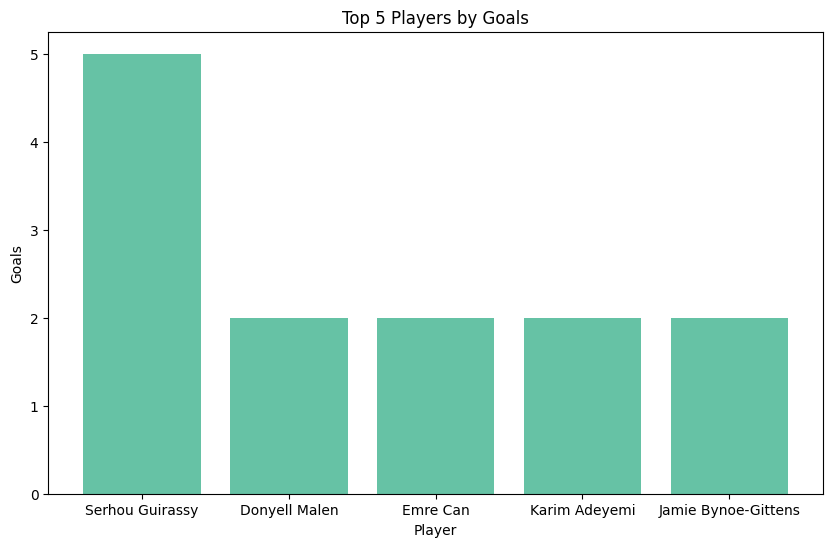

In [49]:
# Initialize a dictionary to store goals for each player
player_goals = {player: 0 for player in players}

# Sum the goals for each player
for player, goal in zip(players, goals):
    try:
        player_goals[player] += int(goal)  # Ensure goal is an integer
    except ValueError:
        print(f"Invalid goal value for {player}: {goal}")  # Catch any invalid goal value

# Sort players by total goals in descending order
sorted_players_goals = sorted(player_goals.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 players
top_5_players = sorted_players_goals[:5]

# Print top 5 players and their goals
print("Top 5 Players by Goals:")
for player, goal in top_5_players:
    print(f"{player}: {goal}")


# Extract the top 5 players and goals for plotting
top_players = [player for player, goal in top_5_players]
top_goals = [goal for player, goal in top_5_players]

# Set the Seaborn color palette to Set2
sns.set_palette("Set2")

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_players, top_goals)

# Add titles and labels
plt.title("Top 5 Players by Goals")
plt.xlabel("Player")
plt.ylabel("Goals")


Top 5 Players by Assists:
Julian Brandt: 3
Karim Adeyemi: 3
Jamie Bynoe-Gittens: 2
Julian Ryerson: 1
Pascal Groß: 1


Text(0, 0.5, 'Assists')

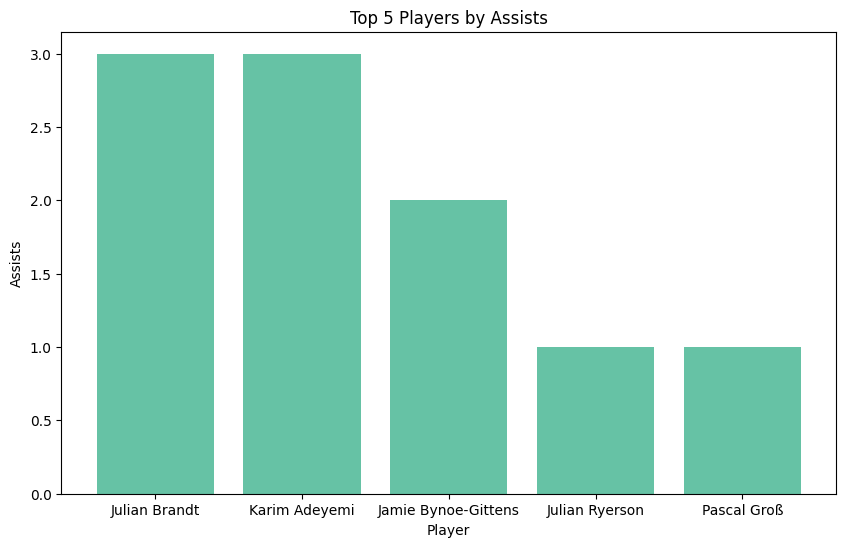

In [50]:
# Initialize a dictionary to store assist for each player
player_assists = {player: 0 for player in players}

# Sum the goals for each player
for player, assist in zip(players, assists):
    try:
        player_assists[player] += int(assist)  # Ensure goal is an integer
    except ValueError:
        print(f"Invalid assist value for {player}: {assist}")  # Catch any invalid goal value

# Sort players by total goals in descending order
sorted_players_assists = sorted(player_assists.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 players
top_5_players_assist = sorted_players_assists[:5]

# Print top 5 players and their goals
print("Top 5 Players by Assists:")
for player, assist in top_5_players_assist:
    print(f"{player}: {assist}")


# Extract the top 5 players and goals for plotting
top_players = [player for player, assist in top_5_players_assist]
top_assists = [assist for player, assist in top_5_players_assist]

# Set the Seaborn color palette to Set2
sns.set_palette("Set2")

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_players, top_assists)

# Add titles and labels
plt.title("Top 5 Players by Assists")
plt.xlabel("Player")
plt.ylabel("Assists")


Top 5 Players by Goals + Assists:
Serhou Guirassy: 6
Karim Adeyemi: 5
Jamie Bynoe-Gittens: 4
Julian Brandt: 3
Julian Ryerson: 2


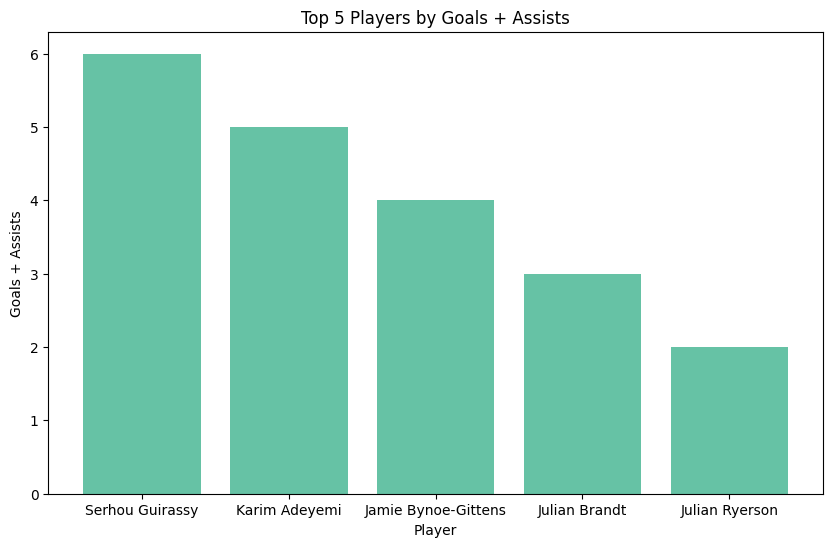

In [52]:
# Initialize dictionaries to store goals and assists for each player
player_goals = {player: 0 for player in players}
player_assists = {player: 0 for player in players}

# Sum the goals and assists for each player
for player, goal, assist in zip(players, goals, assists):
    try:
        player_goals[player] += int(goal)  # Ensure goal is an integer
        player_assists[player] += int(assist)  # Ensure assist is an integer
    except ValueError:
        print(f"Invalid goal or assist value for {player}: Goal: {goal}, Assist: {assist}")  # Catch any invalid values

# Calculate the combined goals + assists for each player
player_goals_assists = {player: player_goals[player] + player_assists[player] for player in players}

# Sort players by combined goals + assists in descending order
sorted_players_goals_assists = sorted(player_goals_assists.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 players by combined goals + assists
top_5_players_goals_assists = sorted_players_goals_assists[:5]

# Print top 5 players and their combined goals + assists
print("Top 5 Players by Goals + Assists:")
for player, goals_assists in top_5_players_goals_assists:
    print(f"{player}: {goals_assists}")

# Extract the top 5 players and combined goals + assists for plotting
top_players = [player for player, goals_assists in top_5_players_goals_assists]
top_goals_assists = [goals_assists for player, goals_assists in top_5_players_goals_assists]

# Set the Seaborn color palette to Set2
sns.set_palette("Set2")

# Create the bar plot for Goals + Assists
plt.figure(figsize=(10, 6))
plt.bar(top_players, top_goals_assists)

# Add titles and labels
plt.title("Top 5 Players by Goals + Assists")
plt.xlabel("Player")
plt.ylabel("Goals + Assists")
plt.show()


Top 5 Players by Goals per Minute:
Serhou Guirassy: 0.0081 goals/minute
Karim Adeyemi: 0.0064 goals/minute
Donyell Malen: 0.0055 goals/minute
Jamie Bynoe-Gittens: 0.0040 goals/minute
Emre Can: 0.0035 goals/minute

Top 5 Players by Assists per Minute:
Karim Adeyemi: 0.0096 assists/minute
Julian Brandt: 0.0040 assists/minute
Jamie Bynoe-Gittens: 0.0040 assists/minute
Maximilian Beier: 0.0029 assists/minute
Felix Nmecha: 0.0029 assists/minute


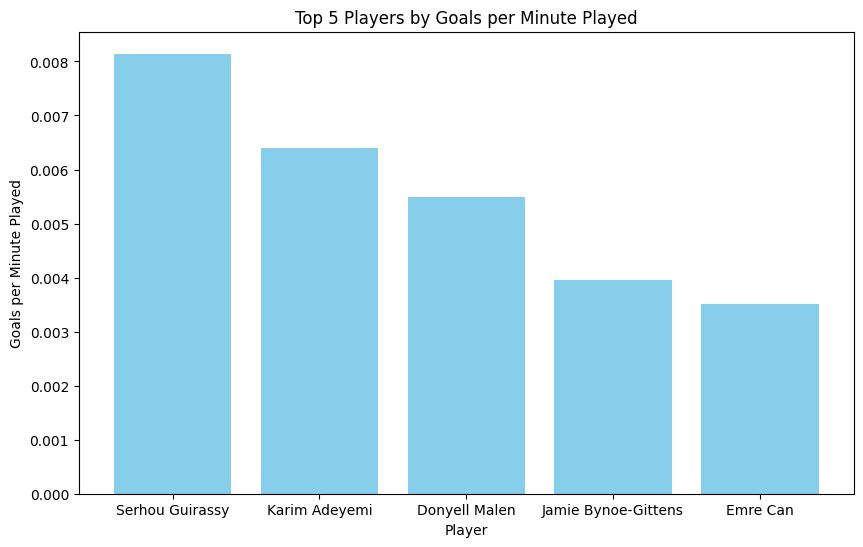

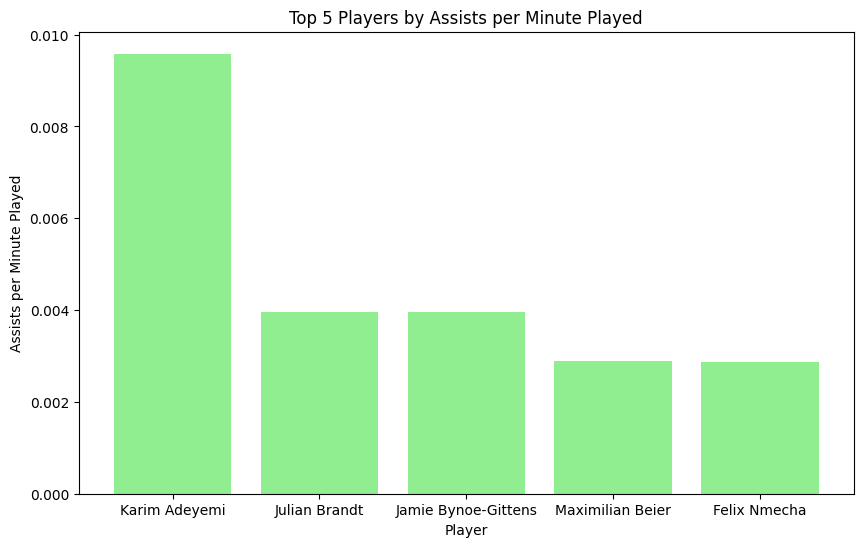

In [54]:
# Initialize dictionaries to store stats for each player
player_goals = {player: 0 for player in players}
player_assists = {player: 0 for player in players}
player_minutes_played = {player: 0 for player in players}

# Sum the goals, assists, and minutes played for each player
for player, goal, assist, minutes in zip(players, goals, assists, minutes_played):
    try:
        player_goals[player] += int(goal)  # Ensure goal is an integer
        player_assists[player] += int(assist)  # Ensure assist is an integer
        player_minutes_played[player] += int(minutes)  # Ensure minutes is an integer
    except ValueError:
        print(f"Invalid value for {player}: Goal: {goal}, Assist: {assist}, Minutes: {minutes}")  # Catch any invalid values

# Calculate Goals per Minute for each player
player_goals_per_minute = {
    player: (player_goals[player] / player_minutes_played[player]) if player_minutes_played[player] > 0 else 0
    for player in players
}

# Calculate Assists per Minute for each player
player_assists_per_minute = {
    player: (player_assists[player] / player_minutes_played[player]) if player_minutes_played[player] > 0 else 0
    for player in players
}

# Sort players by Goals per Minute in descending order
sorted_players_goals_per_minute = sorted(player_goals_per_minute.items(), key=lambda x: x[1], reverse=True)

# Sort players by Assists per Minute in descending order
sorted_players_assists_per_minute = sorted(player_assists_per_minute.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 players by Goals per Minute
top_5_players_goals_per_minute = sorted_players_goals_per_minute[:5]

# Get the top 5 players by Assists per Minute
top_5_players_assists_per_minute = sorted_players_assists_per_minute[:5]

# Print top 5 players for Goals per Minute
print("Top 5 Players by Goals per Minute:")
for player, goals_per_minute in top_5_players_goals_per_minute:
    print(f"{player}: {goals_per_minute:.4f} goals/minute")

# Print top 5 players for Assists per Minute
print("\nTop 5 Players by Assists per Minute:")
for player, assists_per_minute in top_5_players_assists_per_minute:
    print(f"{player}: {assists_per_minute:.4f} assists/minute")

# Extract the top 5 players and goals per minute for plotting
top_players_goals = [player for player, goals_per_minute in top_5_players_goals_per_minute]
top_goals_per_minute = [goals_per_minute for player, goals_per_minute in top_5_players_goals_per_minute]

# Extract the top 5 players and assists per minute for plotting
top_players_assists = [player for player, assists_per_minute in top_5_players_assists_per_minute]
top_assists_per_minute = [assists_per_minute for player, assists_per_minute in top_5_players_assists_per_minute]

# Set the Seaborn color palette to Set2
sns.set_palette("Set2")

# Create the bar plot for Goals per Minute Played
plt.figure(figsize=(10, 6))
plt.bar(top_players_goals, top_goals_per_minute, color='skyblue')

# Add titles and labels
plt.title("Top 5 Players by Goals per Minute Played")
plt.xlabel("Player")
plt.ylabel("Goals per Minute Played")
plt.show()

# Create the bar plot for Assists per Minute Played
plt.figure(figsize=(10, 6))
plt.bar(top_players_assists, top_assists_per_minute, color='lightgreen')

# Add titles and labels
plt.title("Top 5 Players by Assists per Minute Played")
plt.xlabel("Player")
plt.ylabel("Assists per Minute Played")
plt.show()


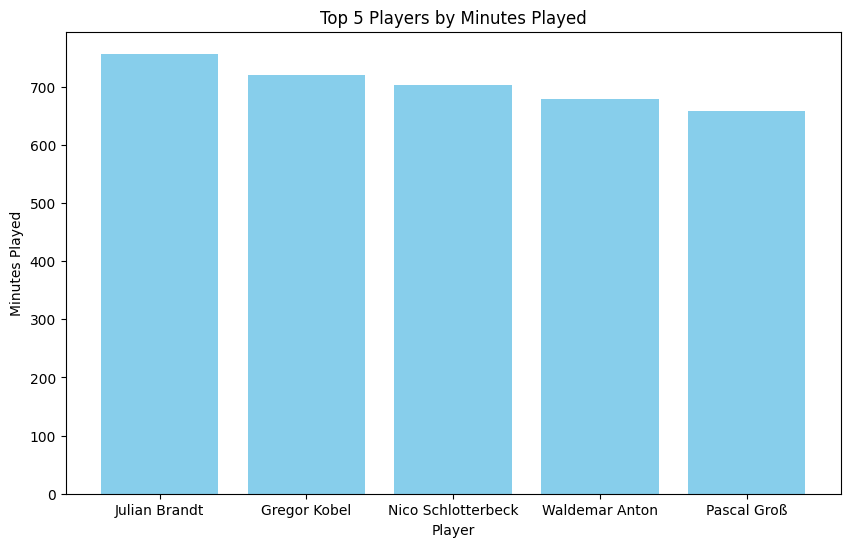

In [55]:
# Convert to lists for plotting
players = [player["player"] for player in players_stats]
minutes_played = [int(player["minutes_played"]) for player in players_stats]  # Ensure minutes are integers

# Create a dictionary to store the total minutes played for each player
player_minutes = {}

# Sum the minutes played for each player
for player, minutes in zip(players, minutes_played):
    if player in player_minutes:
        player_minutes[player] += minutes
    else:
        player_minutes[player] = minutes

# Sort players by total minutes played in descending order
sorted_players = sorted(player_minutes.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 players by minutes played
top_5_players = sorted_players[:5]

# Extract names and minutes for plotting
top_players = [player for player, minutes in top_5_players]
top_minutes = [minutes for player, minutes in top_5_players]

# Create a bar plot for top 5 players by minutes played
plt.figure(figsize=(10, 6))
plt.bar(top_players, top_minutes, color='skyblue')

# Add titles and labels
plt.title("Top 5 Players by Minutes Played")
plt.xlabel("Player")
plt.ylabel("Minutes Played")

# Show the plot
plt.show()

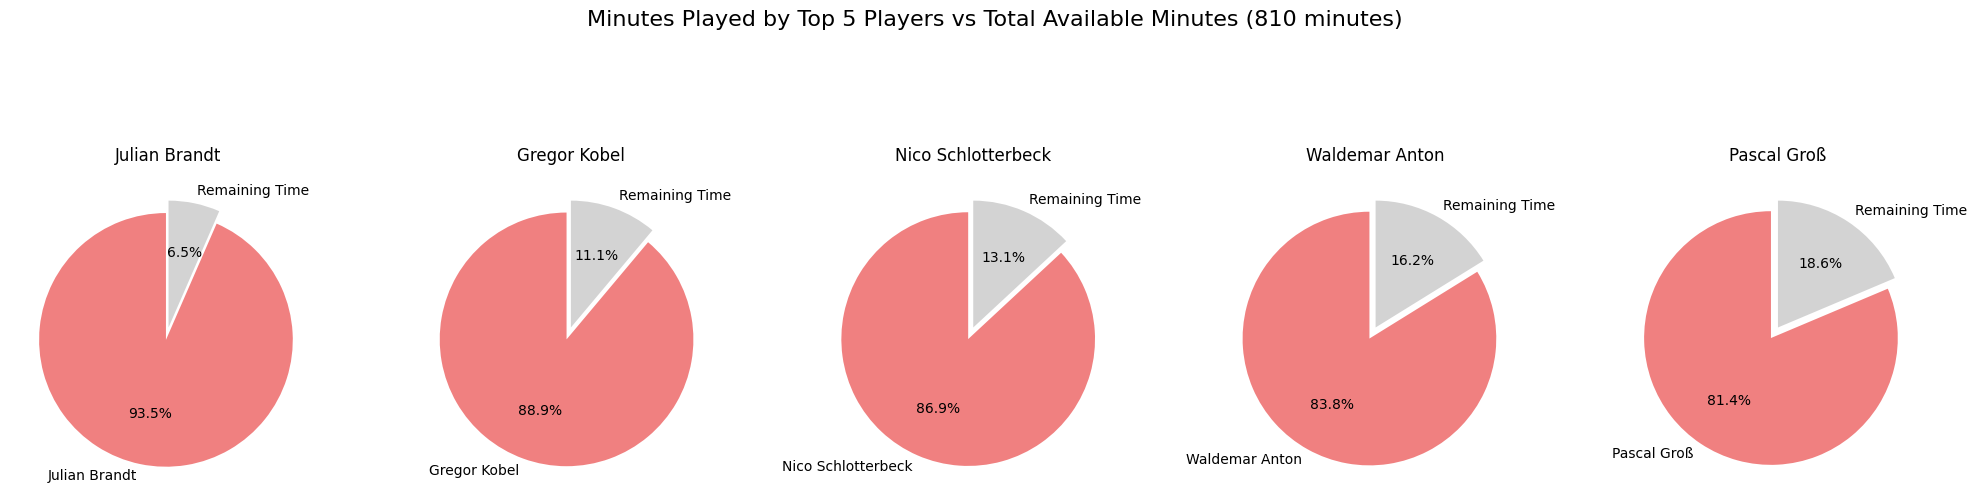

In [57]:
# Total available minutes for BVB (90 minutes per match, 9 matches)
total_available_minutes = 90 * 9  # 810 minutes

# Extract names and total minutes for the top 5 players
top_players = [player for player, minutes in top_5_players]
top_minutes = [minutes for player, minutes in top_5_players]

# Create subplots (5 horizontal pie charts)
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 row, 5 columns
fig.suptitle("Minutes Played by Top 5 Players vs Total Available Minutes (810 minutes)", fontsize=16)

# Plot pie chart for each of the top 5 players
for i, (player, minutes) in enumerate(zip(top_players, top_minutes)):
    # Calculate the percentage of total minutes played by this player
    percentage_played = (minutes / total_available_minutes) * 100

    # Create the pie chart for each player
    axes[i].pie([percentage_played, 100 - percentage_played],
                labels=[f"{player}", "Remaining Time"],
                colors=['lightcoral', 'lightgrey'],
                explode=(0.1, 0),  # Explode the player slice for emphasis
                autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"{player}", fontsize=12)

# Adjust the layout to make sure everything fits
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()


Top 5 Players by Goals per Shot:
Emre Can: 0.3333 goals/shot
Felix Nmecha: 0.3333 goals/shot
Donyell Malen: 0.2500 goals/shot
Karim Adeyemi: 0.2500 goals/shot
Serhou Guirassy: 0.2174 goals/shot


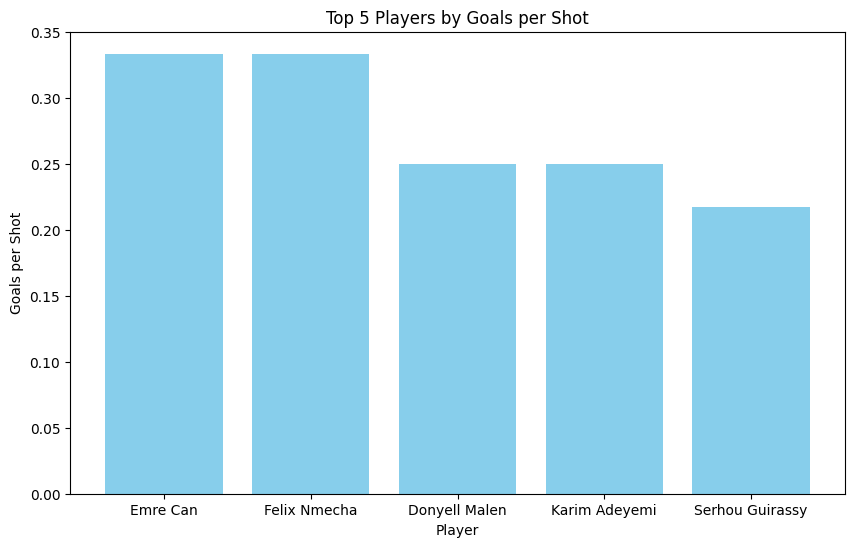

In [58]:
# Initialize dictionaries for goals and shots for each player
player_goals = {player: 0 for player in players}
player_shots = {player: 0 for player in players}

# Sum the goals and shots for each player
for player, goal, shot in zip(players, goals, shots):
    try:
        player_goals[player] += int(goal)  # Ensure goal is an integer
        player_shots[player] += int(shot)  # Ensure shot is an integer
    except ValueError:
        print(f"Invalid value for {player}: Goal: {goal}, Shots: {shot}")  # Catch any invalid values

# Calculate Goals per Shot for each player
player_goals_per_shot = {
    player: (player_goals[player] / player_shots[player]) if player_shots[player] > 0 else 0
    for player in players
}

# Sort players by Goals per Shot in descending order
sorted_players_goals_per_shot = sorted(player_goals_per_shot.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 players by Goals per Shot
top_5_players_goals_per_shot = sorted_players_goals_per_shot[:5]

# Print top 5 players for Goals per Shot
print("Top 5 Players by Goals per Shot:")
for player, goals_per_shot in top_5_players_goals_per_shot:
    print(f"{player}: {goals_per_shot:.4f} goals/shot")

# Extract the top 5 players and their goals per shot for plotting
top_players_goals = [player for player, goals_per_shot in top_5_players_goals_per_shot]
top_goals_per_shot = [goals_per_shot for player, goals_per_shot in top_5_players_goals_per_shot]

# Set the Seaborn color palette to Set2
sns.set_palette("Set2")

# Create the bar plot for Goals per Shot
plt.figure(figsize=(10, 6))
plt.bar(top_players_goals, top_goals_per_shot, color='skyblue')

# Add titles and labels
plt.title("Top 5 Players by Goals per Shot")
plt.xlabel("Player")
plt.ylabel("Goals per Shot")
plt.show()


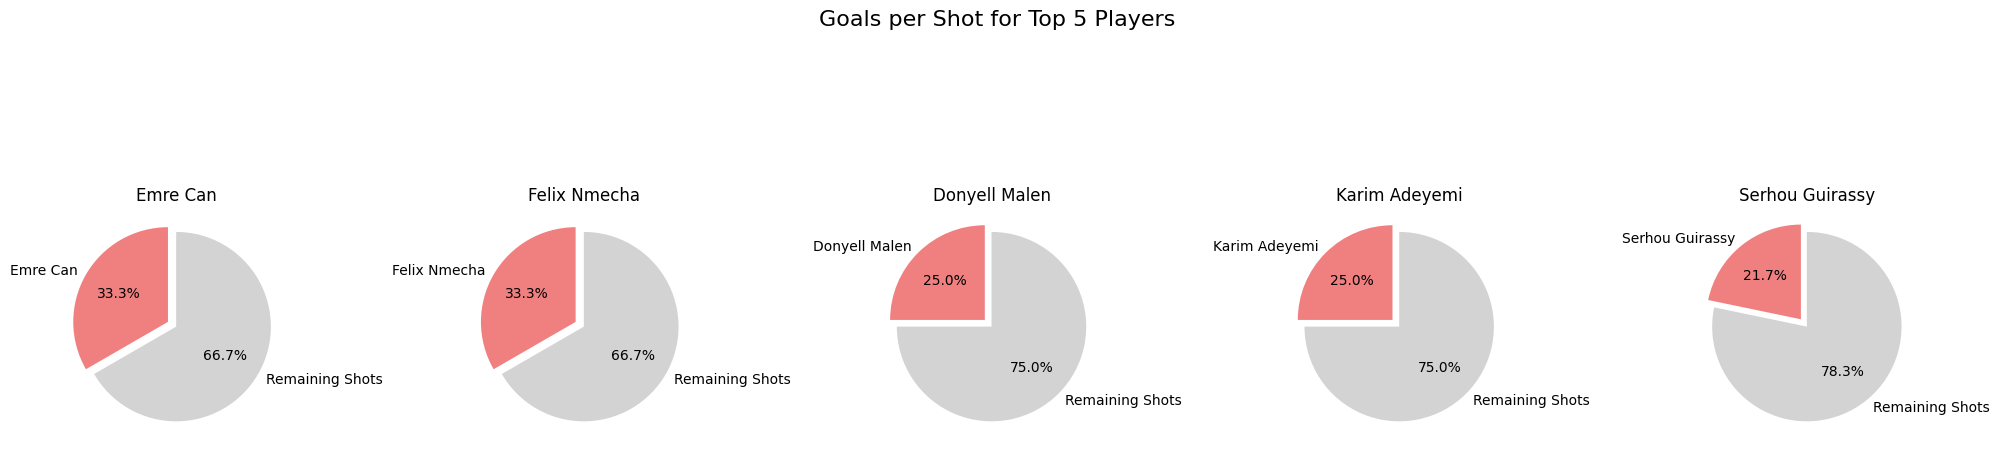

In [59]:
# Pie chart for Goals per Shot Percentage
fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 row, 5 columns
fig.suptitle("Goals per Shot for Top 5 Players", fontsize=16)

for i, (player, goals_per_shot) in enumerate(zip(top_players_goals, top_goals_per_shot)):
    # Calculate percentage of goals relative to shots
    percentage_goals = goals_per_shot * 100  # Convert ratio to percentage

    # Create the pie chart for each player
    axes[i].pie([percentage_goals, 100 - percentage_goals],
                labels=[f"{player}", "Remaining Shots"],
                colors=['lightcoral', 'lightgrey'],
                explode=(0.1, 0),  # Explode the player slice for emphasis
                autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"{player}", fontsize=12)

# Adjust the layout to make sure everything fits
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()


# shots stats

In [70]:
# Initialize an empty list to store valid player stats with matching match_id
shots_stats = []

# Iterate over each shot document in the `collection_shots`
for shot_doc in collection_shots.find():
    match_id = shot_doc.get('match_id')  # Use the shot_doc's match_id
    
    # Query the matches collection to check if there is a match for this match_id
    match_found = collection_matches.find_one({"match_id": match_id})
    
    if match_found:
        # If a match is found, add the shot data to the shots_stats list
        shots_stats.append(shot_doc)

# Output the results to see what has been added to shots_stats
for shot in shots_stats:
    print(shot)

{'_id': ObjectId('672d70da6a1489f850c25db2'), 'id': '586322', 'minute': '19', 'result': 'BlockedShot', 'X': '0.8109999847412109', 'Y': '0.7390000152587891', 'xG': '0.016330625861883163', 'player': 'Nico Schlotterbeck', 'h_a': 'h', 'player_id': '7485', 'situation': 'OpenPlay', 'season': '2024', 'shotType': 'LeftFoot', 'match_id': '27748', 'h_team': 'Borussia Dortmund', 'a_team': 'Eintracht Frankfurt', 'h_goals': '2', 'a_goals': '0', 'date': '2024-08-24 16:30:00', 'player_assisted': 'Karim Adeyemi', 'lastAction': 'Rebound'}
{'_id': ObjectId('672d70da6a1489f850c25db3'), 'id': '586338', 'minute': '64', 'result': 'MissedShots', 'X': '0.705999984741211', 'Y': '0.6459999847412109', 'xG': '0.009876078926026821', 'player': 'Nico Schlotterbeck', 'h_a': 'h', 'player_id': '7485', 'situation': 'OpenPlay', 'season': '2024', 'shotType': 'LeftFoot', 'match_id': '27748', 'h_team': 'Borussia Dortmund', 'a_team': 'Eintracht Frankfurt', 'h_goals': '2', 'a_goals': '0', 'date': '2024-08-24 16:30:00', 'playe

In [71]:
# Assuming players_stats is a list of dictionaries
shots_docs_2024_2025 = len(shots_stats)  # Count the number of items in the list
print(f"Number of documents in shots_stats: {shots_docs_2024_2025}")


Number of documents in shots_stats: 130


In [72]:
shots_stats

[{'_id': ObjectId('672d70da6a1489f850c25db2'),
  'id': '586322',
  'minute': '19',
  'result': 'BlockedShot',
  'X': '0.8109999847412109',
  'Y': '0.7390000152587891',
  'xG': '0.016330625861883163',
  'player': 'Nico Schlotterbeck',
  'h_a': 'h',
  'player_id': '7485',
  'situation': 'OpenPlay',
  'season': '2024',
  'shotType': 'LeftFoot',
  'match_id': '27748',
  'h_team': 'Borussia Dortmund',
  'a_team': 'Eintracht Frankfurt',
  'h_goals': '2',
  'a_goals': '0',
  'date': '2024-08-24 16:30:00',
  'player_assisted': 'Karim Adeyemi',
  'lastAction': 'Rebound'},
 {'_id': ObjectId('672d70da6a1489f850c25db3'),
  'id': '586338',
  'minute': '64',
  'result': 'MissedShots',
  'X': '0.705999984741211',
  'Y': '0.6459999847412109',
  'xG': '0.009876078926026821',
  'player': 'Nico Schlotterbeck',
  'h_a': 'h',
  'player_id': '7485',
  'situation': 'OpenPlay',
  'season': '2024',
  'shotType': 'LeftFoot',
  'match_id': '27748',
  'h_team': 'Borussia Dortmund',
  'a_team': 'Eintracht Frankfur

In [83]:
# Convert the list to a DataFrame
shots_stats = pd.DataFrame(shots_stats)

In [85]:
shots_stats

,_id,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,672d70da6a1489f850c25db2,586322,19,BlockedShot,0.8109999847412109,0.7390000152587891,0.016330625861883163,Nico Schlotterbeck,h,7485,...,2024,LeftFoot,27748,Borussia Dortmund,Eintracht Frankfurt,2,0,2024-08-24 16:30:00,Karim Adeyemi,Rebound
1,672d70da6a1489f850c25db3,586338,64,MissedShots,0.705999984741211,0.6459999847412109,0.009876078926026821,Nico Schlotterbeck,h,7485,...,2024,LeftFoot,27748,Borussia Dortmund,Eintracht Frankfurt,2,0,2024-08-24 16:30:00,None,None
2,672d70da6a1489f850c25db4,589107,62,SavedShot,0.9519999694824218,0.4279999923706055,0.358583927154541,Nico Schlotterbeck,a,7485,...,2024,Head,27753,Werder Bremen,Borussia Dortmund,0,0,2024-08-31 13:30:00,Pascal Groß,Cross
3,672d70da6a1489f850c25db5,600287,58,SavedShot,0.91,0.455,0.10495904833078384,Nico Schlotterbeck,h,7485,...,2024,LeftFoot,27816,Borussia Dortmund,RasenBallsport Leipzig,2,1,2024-11-02 17:30:00,Serhou Guirassy,HeadPass
4,672d70da6a1489f850c25e5c,586337,62,SavedShot,0.7969999694824219,0.605,0.03863631561398506,Niklas Süle,h,75,...,2024,RightFoot,27748,Borussia Dortmund,Eintracht Frankfurt,2,0,2024-08-24 16:30:00,Maximilian Beier,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,672d70da6a1489f850c26970,598337,61,MissedShots,0.92,0.514000015258789,0.06505555659532547,Serhou Guirassy,a,3738,...,2024,Head,27809,Augsburg,Borussia Dortmund,2,1,2024-10-26 13:30:00,Jamie Bynoe-Gittens,Chipped
126,672d70da6a1489f850c26971,600289,62,BlockedShot,0.845999984741211,0.5329999923706055,0.088520348072052,Serhou Guirassy,h,3738,...,2024,RightFoot,27816,Borussia Dortmund,RasenBallsport Leipzig,2,1,2024-11-02 17:30:00,Alexander Meyer,Pass
127,672d70da6a1489f850c26972,600290,63,Goal,0.9269999694824219,0.5209999847412109,0.3301831781864166,Serhou Guirassy,h,3738,...,2024,OtherBodyPart,27816,Borussia Dortmund,RasenBallsport Leipzig,2,1,2024-11-02 17:30:00,Maximilian Beier,Cross
128,672d70da6a1489f850c26998,595383,18,SavedShot,0.7969999694824219,0.33299999237060546,0.025240633636713028,Yan Couto,a,10946,...,2024,LeftFoot,27791,Union Berlin,Borussia Dortmund,2,1,2024-10-05 13:30:00,Julian Brandt,Pass
